In [71]:
import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, decomposition, datasets, metrics

from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

In [72]:
public_data = pd.read_csv('data_public.csv')


In [73]:
public_data.shape

(1200000, 16)

In [74]:
public_data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.166636e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.872945e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


In [5]:
public_data.head(50)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,3
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,2
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,3
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3
5,235.027198,-16.081132,213.391582,-12.934912,122.413766,80.222540,125.240412,185.694965,66.072251,142.555417,213.442083,0.728989,-26.046291,137.529415,143.348783,3
6,-35.819795,-16.688245,5.738227,17.570011,-31.523595,-20.625764,0.077354,-28.944922,-10.699215,26.982097,2.958726,-2.365574,-56.082634,-6.918042,-0.996789,2
7,-28.620633,-16.324678,6.614499,19.866385,-23.119998,-22.328572,1.477065,-26.383605,-8.616671,28.874319,1.743714,4.953251,-55.702022,-8.014284,2.449081,2
8,-41.092898,-11.525839,12.027010,18.670988,-19.612979,-25.918632,5.266337,-25.972718,-13.371210,25.709532,-1.515002,-1.041023,-54.683633,-12.382565,5.424004,2
9,222.645628,-10.907163,215.098599,-15.552786,126.227053,85.659915,106.932482,195.793702,79.786718,138.150287,223.018301,-11.896866,-15.113817,146.038066,140.611871,3


Both the N and O features have certain range that determine the class. If N is greater than 100 than it is class 3. If N is less than 100 but positive than it is class 1. If N is negative it is class 2. This holds completely for the entire dataset. 

In [6]:
class_2 = public_data[public_data["N"] < 6.6]
class_2["Class"].describe()

count    599831.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0
Name: Class, dtype: float64

In [7]:
not_class_2 = public_data[public_data["N"] >= 6.6]
not_class_2[not_class_2["Class"] == 2].count()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [8]:
class_3 = public_data[public_data["N"] > 65]
class_3["Class"].describe()

count    400066.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: Class, dtype: float64

In [9]:
not_class_3 = public_data[public_data["N"] <= 65]
not_class_3[not_class_3["Class"] == 3].count()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [10]:
tmp = public_data[public_data["N"] <= 65]
class_1 = tmp[tmp["N"] >= 6.6]
class_1["Class"].describe()

count    200103.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Class, dtype: float64

In [11]:
tmp = public_data[public_data["N"] > 65]
not_class_1 = tmp[tmp["N"] < 6.6]
not_class_1[not_class_1["Class"]==1].count()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [12]:
public_data["Class"].count() == class_1["Class"].count() + class_2["Class"].count() + class_3["Class"].count()

True

As you can see by filtering out all values in N that are less than 6.6 I am able to extract all of class 2. 

In [13]:
pub_c1 = public_data[public_data["Class"] == 1]
pub_c2 = public_data[public_data["Class"] == 2]
pub_c3 = public_data[public_data["Class"] == 3]

print(pub_c1["Class"].describe())
print(pub_c2["Class"].describe())
print(pub_c3["Class"].describe())

count    200103.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Class, dtype: float64
count    599831.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0
Name: Class, dtype: float64
count    400066.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: Class, dtype: float64


In [14]:
min_1 = pub_c1.min()
max_1 = pub_c1.max()
min_2 = pub_c2.min()
max_2 = pub_c2.max()
min_3 = pub_c3.min()
max_3 = pub_c3.max()

In [ ]:
A1_tmp = public_data[public_data["A"] >= min_1["A"]]
tmp2 = A1_tmp[A1_tmp["A"] < max_1["A"]]
A1 = pd.concat([tmp2["A"],tmp2["Class"]], axis=1)
print(A1[A1["Class"]==1]["A"].count(),A1[A1["Class"]==2]["A"].count(),A1[A1["Class"]==3]["A"].count())
A1_tmp = public_data[public_data["A"] >= min_2["A"]]
tmp2 = A1_tmp[A1_tmp["A"] < max_2["A"]]
A1 = pd.concat([tmp2["A"],tmp2["Class"]], axis=1)
print(A1[A1["Class"]==1]["A"].count(),A1[A1["Class"]==2]["A"].count(),A1[A1["Class"]==3]["A"].count())

In [15]:
np_values = public_data.values
standard_scaler = StandardScaler()
vals_scaled = standard_scaler.fit_transform(np_values)
public_scaled = pd.DataFrame(vals_scaled, columns=public_data.columns)
public_scaled = public_scaled.drop(columns="Class")
public_scaled.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,-3.643659e-17,-2.155209e-16,2.813494e-16,1.553099e-16,7.729761e-17,-3.568016e-17,9.957905e-17,3.148870e-17,6.199393e-17,-1.551724e-16,9.179620e-17,2.122283e-16,-3.071542e-16,-1.836540e-16,-5.088456e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.576537e-01,-4.451873e+00,-1.247617e+00,-2.644705e+00,-9.302043e-01,-1.948346e+00,-1.475652e+00,-9.050405e-01,-1.213772e+00,-1.992491e+00,-9.862478e-01,-3.593717e+00,-2.184472e+00,-1.041432e+00,-1.087707e+00
25%,-6.856782e-01,6.686056e-02,-6.085477e-01,-2.478078e-02,-7.388438e-01,-3.357422e-01,-5.288938e-01,-7.487208e-01,-9.626425e-01,-2.579156e-01,-8.115155e-01,-1.366680e-01,-7.453553e-01,-8.415592e-01,-8.931280e-01
50%,-6.395787e-01,3.550282e-01,-5.521766e-01,1.182764e-01,-6.647971e-01,-2.540494e-01,-4.541885e-01,-6.701335e-01,1.112827e-01,-1.787165e-01,-5.572950e-01,3.638817e-01,-5.947576e-01,-5.182225e-01,-1.933404e-01
75%,1.371888e+00,5.723130e-01,1.336639e+00,7.059888e-01,1.365782e+00,1.156495e+00,1.252824e+00,1.358384e+00,1.110893e+00,1.097673e+00,1.320777e+00,6.472593e-01,1.129887e+00,1.291130e+00,1.277773e+00
max,1.687340e+00,1.610521e+00,1.752916e+00,9.848922e-01,1.765142e+00,1.766344e+00,2.016591e+00,1.758369e+00,1.856630e+00,1.749513e+00,1.902329e+00,1.819692e+00,2.939533e+00,1.923838e+00,1.810468e+00


In [16]:
count = 0
matches = []
next_col = public_scaled.columns
for out in public_scaled.columns:
    class_squeeze = np.squeeze(np.asarray(public_data[out]))
    next_col = next_col.drop(out)
    for col in next_col:
        plen = np.squeeze(np.asarray(public_scaled[col]))
#         displen = np.dot(class_squeeze, plen)/(np.linalg.norm(class_squeeze)*(np.linalg.norm(plen)))
#         print(col,"x", out, str(displen))
#         print()
        if np.corrcoef(plen, class_squeeze)[0][1] > 0.98:
            count = count + 1
            matches.append(out + "x" + col)
        else:
            print(out,"x", col, np.corrcoef(plen, class_squeeze)[0][1])
print(count)
print(matches)

A x B 0.45594899913739995
A x D 0.07133038261793932
A x F 0.9053527491919926
A x G 0.9722228293725423
A x I 0.818399477866533
A x J 0.8700161418532376
A x K 0.9688268409718942
A x L 0.13961922160478893
A x M 0.9589305776748331
A x N 0.9530810727057415
A x O 0.9203218267294551
B x C 0.5417419491831306
B x D 0.8658557861095647
B x E 0.352945509847112
B x F 0.7607075034625481
B x G 0.6206066839190909
B x H 0.3395488747773573
B x I -0.09855774900748483
B x J 0.8032458316210619
B x K 0.24642852214341437
B x L 0.8546348126678589
B x M 0.3450300710350118
B x N 0.19457819994773715
B x O 0.09880504441797408
C x D 0.17622393427281127
C x E 0.971805425537075
C x F 0.9434815338787507
C x H 0.968342197464496
C x I 0.7534744977354667
C x J 0.9157843192415979
C x K 0.9378683341980713
C x L 0.23872344593839076
C x M 0.9410404838855062
C x N 0.916578204618697
C x O 0.8737999250049017
D x E -0.047458976260814675
D x F 0.47718279937971997
D x G 0.27924786217156206
D x H -0.062450906164409854
D x I -0.502

In [17]:
public_scaled = public_scaled.drop(columns = ["E", "H", "C", "G", "K", "N", "O", "J"])

In [18]:

count = 0
matches = []
next_col = public_scaled.columns
for out in public_scaled.columns:
    class_squeeze = np.squeeze(np.asarray(public_data[out]))
    next_col = next_col.drop(out)
    for col in next_col:
        plen = np.squeeze(np.asarray(public_scaled[col]))
#         displen = np.dot(class_squeeze, plen)/(np.linalg.norm(class_squeeze)*(np.linalg.norm(plen)))
#         print(col,"x", out, str(displen))
#         print()
        if np.corrcoef(plen, class_squeeze)[0][1] > 0.9:
            count = count + 1
            matches.append(out + "x" + col)
        else:
            print(out,"x", col, np.corrcoef(plen, class_squeeze)[0][1])

print(count)
print(matches)

A x B 0.45594899913739995
A x D 0.07133038261793932
A x I 0.818399477866533
A x L 0.13961922160478893
B x D 0.8658557861095647
B x F 0.7607075034625481
B x I -0.09855774900748483
B x L 0.8546348126678589
B x M 0.3450300710350118
D x F 0.47718279937971997
D x I -0.5026434510949506
D x M -0.04205688301850702
F x I 0.5083454264195518
F x L 0.5181168926181521
F x M 0.8235514707732727
I x L -0.41811033513211604
I x M 0.8488005802749112
L x M 0.029013289957726715
3
['AxF', 'AxM', 'DxL']


In [19]:
public_scaled = public_scaled.drop(columns = ["F", "M", "L"])

In [20]:

count = 0
matches = []
next_col = public_scaled.columns
for out in public_scaled.columns:
    class_squeeze = np.squeeze(np.asarray(public_data[out]))
    next_col = next_col.drop(out)
    for col in next_col:
        plen = np.squeeze(np.asarray(public_scaled[col]))
#         displen = np.dot(class_squeeze, plen)/(np.linalg.norm(class_squeeze)*(np.linalg.norm(plen)))
#         print(col,"x", out, str(displen))
#         print()
        if np.corrcoef(plen, class_squeeze)[0][1] > 0.9:
            count = count + 1
            matches.append(out + "x" + col)
        else:
            print(out,"x", col, np.corrcoef(plen, class_squeeze)[0][1])

print(count)
print(matches)

A x B 0.45594899913739995
A x D 0.07133038261793932
A x I 0.818399477866533
B x D 0.8658557861095647
B x I -0.09855774900748483
D x I -0.5026434510949506
0
[]


In [21]:
public_scaled.describe()

,A,B,D,I
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,-3.643659e-17,-2.155209e-16,1.553099e-16,6.199393e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.576537e-01,-4.451873e+00,-2.644705e+00,-1.213772e+00
25%,-6.856782e-01,6.686056e-02,-2.478078e-02,-9.626425e-01
50%,-6.395787e-01,3.550282e-01,1.182764e-01,1.112827e-01
75%,1.371888e+00,5.723130e-01,7.059888e-01,1.110893e+00
max,1.687340e+00,1.610521e+00,9.848922e-01,1.856630e+00


In [75]:
X_train, X_test, y_train, y_test = train_test_split(public_data.drop(columns=["Class","E", "H", "C", "G", "K", "N", "O", "J", "F", "M", "L"]),
                                                   public_data["Class"],
                                                 test_size=0.3)


In [76]:
pub_train = pd.concat([X_train,
                        y_train],
                       axis=1)
pub_train.head()

,A,B,D,I,Class
690961,243.823407,-8.777110,-13.312328,77.839375,3
1083027,240.709334,-15.583198,-14.085275,78.345435,3
935306,-60.998566,-55.178352,-110.507823,44.446558,1
738358,-54.633865,-43.305190,-116.431533,62.918027,1
350803,244.304977,-6.800002,-12.537950,77.424797,3


In [77]:
pub_train.describe()

,A,B,D,I,Class
count,840000.000000,840000.000000,840000.000000,840000.000000,840000.000000
mean,50.654811,-18.852528,-13.615211,33.021180,2.166071
std,129.255500,14.478323,46.947873,42.156387,0.687732
min,-73.089401,-79.618525,-137.230444,-18.185416,1.000000
25%,-37.945506,-17.876758,-14.720445,-7.586726,2.000000
50%,-31.991979,-13.702068,-8.705290,39.545383,2.000000
75%,228.018272,-10.561261,19.554615,79.839649,3.000000
max,268.773840,4.460108,32.637993,111.297012,3.000000


In [78]:
pub_test = pd.concat([X_test,
                       y_test],
                      axis=1)
pub_test.head()

,A,B,D,I,Class
813717,-31.412406,-13.534527,19.807130,-9.028591,2
296522,-37.127065,-21.487834,18.796902,-9.750425,2
5470,-59.571730,-51.610161,-116.157479,51.823990,1
935817,-32.428688,-10.685475,18.809336,-6.395639,2
854211,231.218022,-6.651403,-12.052368,84.844897,3


In [79]:
pub_test.describe()

,A,B,D,I,Class
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,50.760641,-18.789859,-13.401853,32.953152,2.167953
std,129.234795,14.428931,46.780271,42.205724,0.686271
min,-71.799515,-83.223570,-137.581849,-17.560263,1.000000
25%,-37.918018,-17.842916,-14.696265,-7.614032,2.000000
50%,-31.947289,-13.691194,11.008393,-1.231618,2.000000
75%,227.968538,-10.543371,19.565595,79.866555,3.000000
max,264.703946,3.239603,31.558225,109.726704,3.000000


Text(0, 0.5, 'explained_variance_')

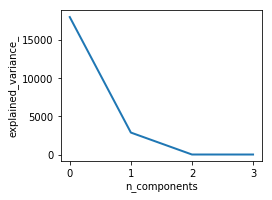

In [80]:
#https://scikit-learn.org/0.18/auto_examples/plot_digits_pipe.html
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [81]:
'''sepal_features = [0,1]
petal_features = [2,3]

sepal_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='mean')),
    ('scaler',
     StandardScaler())
])

petal_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='median')),
    ('scaler',
     StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('sepal',
     sepal_transformer,
     sepal_features),
    ('petal',
     petal_transformer,
     petal_features)
])
'''
preprocessor = decomposition.PCA()
classifier = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)

In [82]:
pipeline = Pipeline(steps=[
    ('classifier',
     classifier)
])


In [83]:
#Grid search for parameters for RandomForest and PCA
#n_components = [2, 5, 10]
#Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

#estimator = GridSearchCV(pipeline,dict(precprocessor__n_components=n_components))
#print(estimator.get_params().keys())
#estimator.fit(X_train, y_train)

In [84]:
# plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
#             linestyle=':', label='n_components chosen')
# plt.legend(prop=dict(size=12))
# plt.show()

In [85]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [86]:
predicted = pipeline.predict(X_test)
print(metrics.classification_report(y_test,
                                    predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59620
           2       1.00      1.00      1.00    180297
           3       1.00      1.00      1.00    120083

   micro avg       1.00      1.00      1.00    360000
   macro avg       1.00      1.00      1.00    360000
weighted avg       1.00      1.00      1.00    360000



In [87]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [88]:
predicted = classifier.predict(X_test)
print("Metrics with random forest")
print(metrics.classification_report(y_test,
                                    predicted))

Metrics with random forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59620
           2       1.00      1.00      1.00    180297
           3       1.00      1.00      1.00    120083

   micro avg       1.00      1.00      1.00    360000
   macro avg       1.00      1.00      1.00    360000
weighted avg       1.00      1.00      1.00    360000



In [89]:
predicted = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 2, min_samples_split = 5).fit(X_train,y_train).predict(X_test)
print(metrics.classification_report(y_test,
                                    predicted))
print(metrics.confusion_matrix(y_test,
                               predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     59620
           2       1.00      1.00      1.00    180297
           3       1.00      1.00      1.00    120083

   micro avg       1.00      1.00      1.00    360000
   macro avg       1.00      1.00      1.00    360000
weighted avg       1.00      1.00      1.00    360000

[[ 59620      0      0]
 [     0 180297      0]
 [     0      0 120083]]


In [90]:
fitted = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 2, min_samples_split = 5).fit(X_train, y_train)
fitted.feature_importances_


array([0., 0., 1., 0.])

In [91]:
fitted.tree_.threshold

array([ -0.10385394, -54.68434143,  -2.        ,  -2.        ,
        -2.        ])

In [92]:
pub_train.columns[fitted.tree_.feature]

Index(['D', 'D', 'I', 'I', 'I'], dtype='object')

In [113]:
input_types = dict([(x, FloatTensorType([1, 1])) for x in X_train.columns.values])
input_types = dict([('I', FloatTensorType([1,1])), ('A', FloatTensorType([1,1])), ('D', FloatTensorType([1,1]))])
try:
    model_onnx = convert_sklearn(pipeline,
                                 'pipeline_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

For operator SklearnRandomForestClassifier (type: SklearnRandomForestClassifier), at most 1 input(s) is(are) supported but we got 3 output(s) which are ['I', 'A', 'D']


In [101]:
X_train.describe()

,A,B,D,I
count,840000.000000,840000.000000,840000.000000,840000.000000
mean,50.654811,-18.852528,-13.615211,33.021180
std,129.255500,14.478323,46.947873,42.156387
min,-73.089401,-79.618525,-137.230444,-18.185416
25%,-37.945506,-17.876758,-14.720445,-7.586726
50%,-31.991979,-13.702068,-8.705290,39.545383
75%,228.018272,-10.561261,19.554615,79.839649
max,268.773840,4.460108,32.637993,111.297012


In [102]:
y_train.describe()

count    840000.000000
mean          2.166071
std           0.687732
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Class, dtype: float64

In [111]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}
#tmp = X_test["I"]
print(X_test.describe())
#inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in tmp.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

                   A              B              D              I
count  360000.000000  360000.000000  360000.000000  360000.000000
mean       50.760641     -18.789859     -13.401853      32.953152
std       129.234795      14.428931      46.780271      42.205724
min       -71.799515     -83.223570    -137.581849     -17.560263
25%       -37.918018     -17.842916     -14.696265      -7.614032
50%       -31.947289     -13.691194      11.008393      -1.231618
75%       227.968538     -10.543371      19.565595      79.866555
max       264.703946       3.239603      31.558225     109.726704


RuntimeError: Method run failed due to: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Invalid Feed Input Names:D. Valid input names are: I 

(-0.5, 1947.5, 1796.5, -0.5)

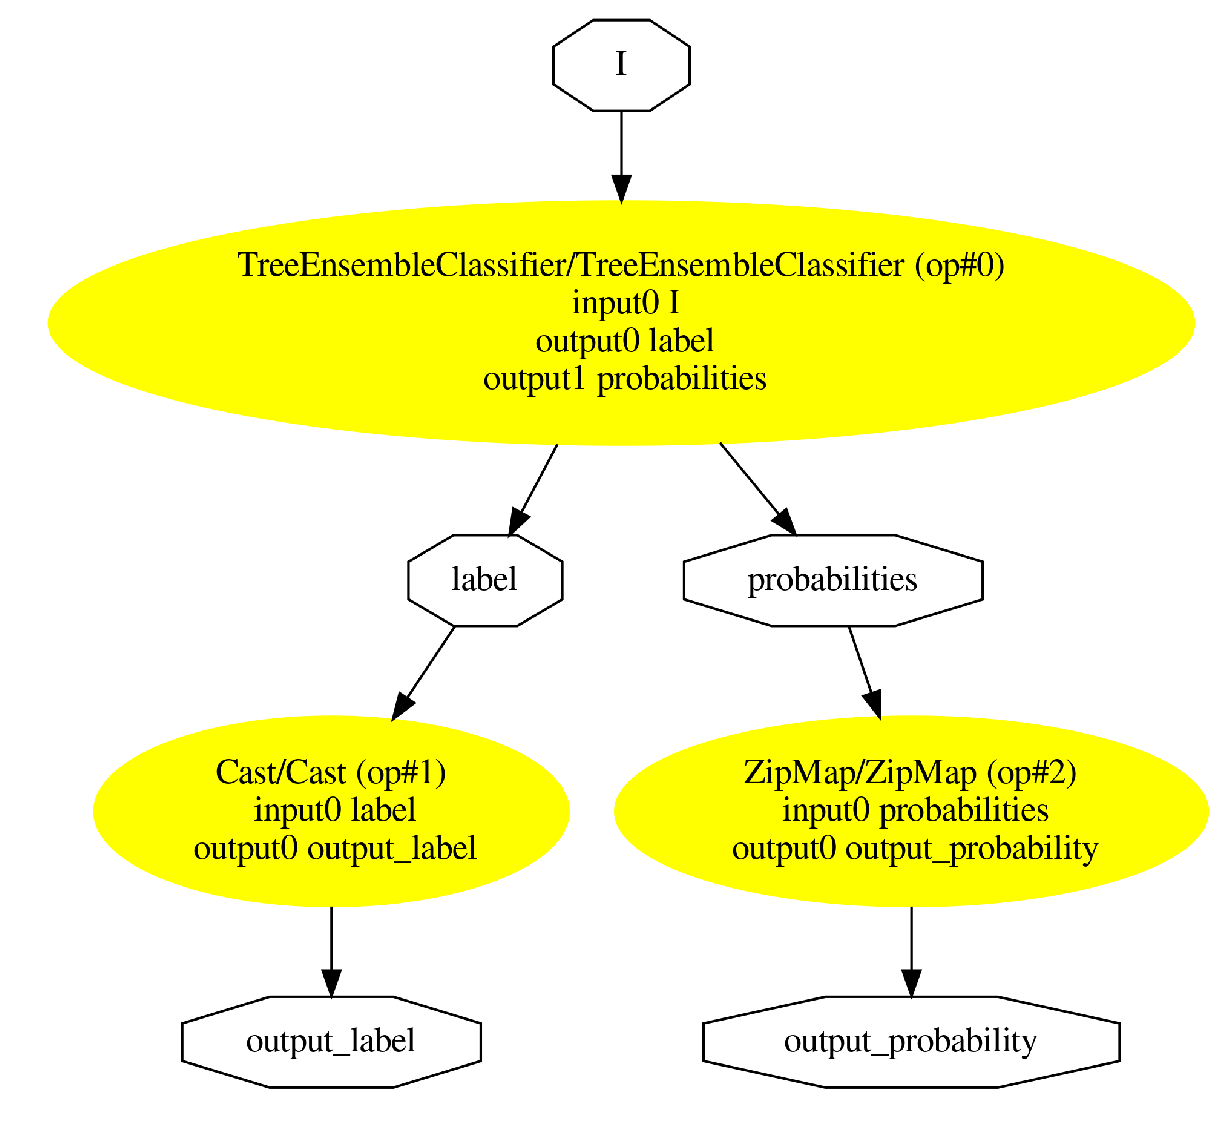

In [63]:
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))
pydot_graph.write_dot("iris_pipeline.dot")

os.system('dot -O -Gdpi=300 -Tpng iris_pipeline.dot')

image = plt.imread("iris_pipeline.dot.png")
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(image)
ax.axis('off')